In [1]:
#-*- coding:utf-8 -*-
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
# 심혈관 질환 데이터셋 불러오기
"""
    데이터셋 출처
    https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
"""
df = pd.read_csv('cardio_train2.csv')

# index를 제거하기 위한 작업
# 기존 DataFrame에는 인덱싱이 되어있기 때문에 그 부분을 제거하기 위한 작업
blankIndex=[''] * len(df)
# index값에 대입하여 인덱싱된 값을 제거
df.index=blankIndex

# 첫 5행을 출력
display(df.head())

# DataFrame의 형태 출력
display(df.describe())
df.info()

,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,1,29,175,59.0,120,80,1,1,0,0,1,0
,1,29,159,59.0,120,80,1,1,0,0,1,0
,2,29,175,92.0,100,60,1,1,0,0,1,0
,1,30,160,59.0,110,70,1,1,0,0,1,0
,1,39,173,73.0,160,100,1,1,0,0,0,1


,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000,65851.000000
mean,1.350033,52.830284,164.433008,74.070119,125.964283,81.206861,1.359402,1.223748,0.087561,0.052801,0.803693,0.490805
std,0.476983,6.760787,8.145586,14.103680,13.998763,8.545518,0.676103,0.570674,0.282658,0.223638,0.397206,0.499919
min,1.000000,29.000000,55.000000,31.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,64.000000,207.000000,200.000000,160.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 65851 entries,  to 
Data columns (total 12 columns):
gender         65851 non-null int64
ages           65851 non-null int64
height         65851 non-null int64
weight         65851 non-null float64
ap_hi          65851 non-null int64
ap_lo          65851 non-null int64
cholesterol    65851 non-null int64
gluc           65851 non-null int64
smoke          65851 non-null int64
alco           65851 non-null int64
active         65851 non-null int64
cardio         65851 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.5+ MB


In [2]:
# 데이터 확인
print("\n* Data Shape : ", df.shape)
print("\n* Class : ", set(df['cardio'].values))
Y_NAME = "class"

#    target이 되는 클래스 : 0, 1
#    전처리 후 : normal, abnormal


* Data Shape :  (65851, 12)

* Class :  {0, 1}


In [3]:
df.rename(index=str, columns={"cardio": Y_NAME}, inplace=True)
df[Y_NAME].replace(0, "normal", inplace=True)
df[Y_NAME].replace(1, "abnormal", inplace=True)

labels = set(df[Y_NAME].values)
print("\n* Class : ",labels)
# 각 컬럼별 NULL값 찾기
print("\nNULL값 확인")
print(df[df.isnull().any(1)])
print("\n 데이터 5줄 출력")
df.head()


* Class :  {'abnormal', 'normal'}

NULL값 확인
Empty DataFrame
Columns: [gender, ages, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, class]
Index: []

 데이터 5줄 출력


,gender,ages,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,class
,1,29,175,59.0,120,80,1,1,0,0,1,normal
,1,29,159,59.0,120,80,1,1,0,0,1,normal
,2,29,175,92.0,100,60,1,1,0,0,1,normal
,1,30,160,59.0,110,70,1,1,0,0,1,normal
,1,39,173,73.0,160,100,1,1,0,0,0,abnormal


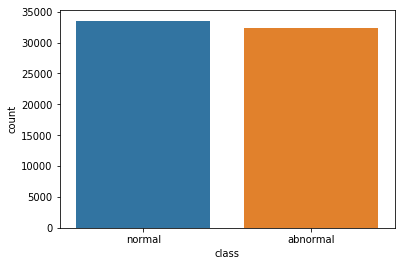

In [4]:
# Data balance확인
sns.countplot(x=df[Y_NAME], data=df)

# 벨런스 편---안

In [5]:
# 데이터 전처리 및 비율 확인
labels_count = dict(normal=0, abnormal=0)
total = 0

print(*np.unique(df[Y_NAME],return_counts=True))
for label in df[Y_NAME].values:
    labels_count[label] += 1
for count in labels_count.values():
    total += count
for label in labels_count.items():
    print("{0: <15} 개수:{1}개\t데이터비중:{2:.3f}".format(*label, label[1]/total))
del labels_count

['abnormal' 'normal'] [32320 33531]
normal          개수:33531개	데이터비중:0.509
abnormal        개수:32320개	데이터비중:0.491


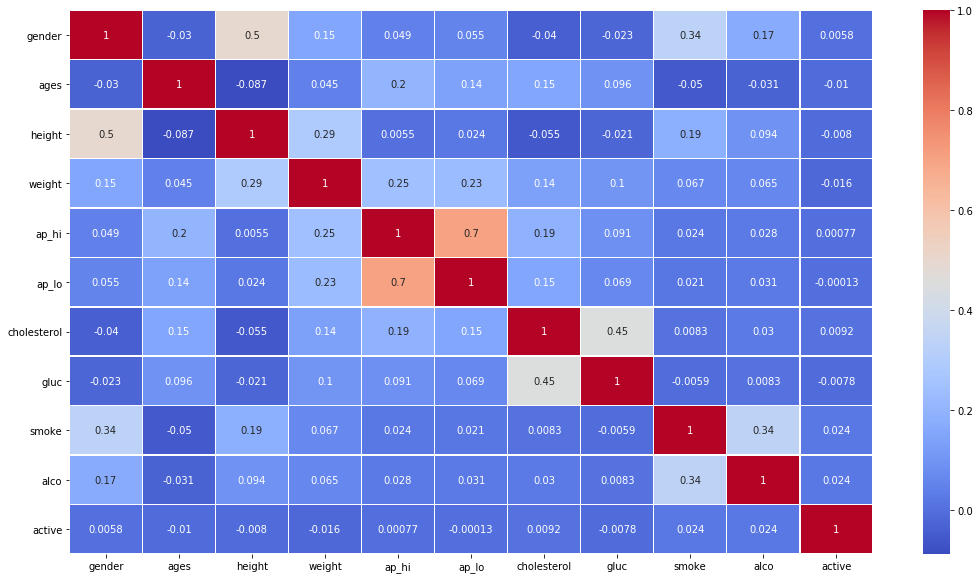

In [6]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(),annot=True,linewidth = 0.5, cmap='coolwarm')

Feature Selection
-------------

1. Univariate Selection
2. Recursive Feature Elimination

In [7]:
x = df[['ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']].values
y = df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)
print("{}".format(fit.scores_))
features = fit.transform(x)

[3.123e+03 1.591e-03 8.319e+00 4.984e+03 1.912e+04 6.351e+03 1.066e+03
 1.335e+02 2.248e+01 8.817e+00 1.863e+01]


In [9]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 'ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

# 최종 사용할 Features : cholesterol, gluc, smoke, alco, active

Num Features: 5
Selected Features: [False False False False False False  True  True  True  True  True]
Feature Ranking: [3 7 6 5 2 4 1 1 1 1 1]


***
### ● Target Features : normal, abnormal
### ● Feature : 11 -> 8
> 본인의 주관적인 특성 제거 : smkoe, alco, active

### ● training : test = 75% : 25%
### ● 아래의 과정으로 최적화 알고리즘 찾기


In [31]:
x = df[['ages','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

# 각 알고리즘별 정확도를 담을 리스트
Classifiers = list()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# KNN분류를 위한 분류모델 생성
clf = KNeighborsClassifier(n_neighbors = 300)

# KNN 분류 모델에 train데이터를 피팅
clf.fit(x_train, y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(clf.predict(x_test)))
print("테스트 세트 정확도 : {:.5f}".format(clf.score(x_test, y_test)))

# 테스트 세트 예측 결과물
y_pred_KN = clf.predict(x_test)
Classifiers.append(y_pred_KN)

테스트 세트 예측 : ['abnormal' 'abnormal' 'normal' ... 'normal' 'normal' 'normal']
테스트 세트 정확도 : 0.71615


In [25]:
# 가우시안 나이브 베이즈 알고리즘
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(GNB.predict(x_test)))
print("테스트 세트 정확도 : {:.5f}".format(GNB.score(x_test, y_test)))

y_pred_NB = GNB.predict(x_test)
Classifiers.append(y_pred_NB)

테스트 세트 예측 : ['normal' 'abnormal' 'normal' ... 'normal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.71050


In [26]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(max_depth=9)
DTR.fit(x_train,y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(DTR.predict(x_test)))
print("테스트 세트 정확도 : {:.5f}".format(DTR.score(x_test, y_test)))

y_pred_Deci = DTR.predict(x_test)
Classifiers.append(y_pred_Deci)

테스트 세트 예측 : ['normal' 'abnormal' 'normal' ... 'normal' 'normal' 'normal']
테스트 세트 정확도 : 0.71967


In [27]:
# 랜덤 포레스트 분류 알고리즘
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=13)
RFC.fit(x_train, y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(RFC.predict(x_test)))
print("테스트 세트 정확도 : {:.5f}".format(RFC.score(x_test, y_test)))

y_pred_RF = RFC.predict(x_test)
Classifiers.append(y_pred_RF)

테스트 세트 예측 : ['normal' 'abnormal' 'normal' ... 'normal' 'abnormal' 'normal']
테스트 세트 정확도 : 0.72423


In [28]:
# GradientBoostingClassifier 사용
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators = 100)
GBC.fit(x_train, y_train)

# 결과 출력
print("테스트 세트 예측 : {}".format(GBC.predict(x_test)))
print("테스트 세트 정확도 : {:.5f}".format(GBC.score(x_test, y_test)))

y_pred_GBC = GBC.predict(x_test)
Classifiers.append(y_pred_GBC)

테스트 세트 예측 : ['normal' 'abnormal' 'normal' ... 'normal' 'normal' 'normal']
테스트 세트 정확도 : 0.72380


정확도 값
-------------

1. Accuracy_Score
2. F1_Score

In [29]:
Class = ['KNeighbors', 'Naive Bayes' ,'DecisionTree', 'RandomForest' , 'GradientBoosting']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(y_test,Classifiers[pred]):
        a = accuracy_score(y_test,Classifiers[pred])
        index=pred
        
    print("{} 분류기 정확도 : {:}%".format(Class[pred],accuracy_score(y_test,Classifiers[pred])*100))
    
print("\n{} 분류기가 가장정확함\n정확도 : {:}%".format(Class[index],a*100))

KNeighbors 분류기 정확도 : 71.40861325396344%
Naive Bayes 분류기 정확도 : 71.0502338577416%
DecisionTree 분류기 정확도 : 71.96744214298731%
RandomForest 분류기 정확도 : 72.42300917208286%
GradientBoosting 분류기 정확도 : 72.3804895827006%

RandomForest 분류기가 가장정확함
정확도 : 72.42300917208286%


In [30]:
from sklearn.metrics import f1_score

for i in range(len(Classifiers)):
    print(Class[i])
    print("macro : {}".format(f1_score(y_test, Classifiers[i], average='macro')))
    print("micro : {}".format(f1_score(y_test, Classifiers[i], average='micro')))
    print("weighted : {}".format(f1_score(y_test, Classifiers[i], average='weighted')))
    print("None : {}\n".format(f1_score(y_test, Classifiers[i], average=None)))

KNeighbors
macro : 0.7122586552752921
micro : 0.7140861325396344
weighted : 0.7127002027545577
None : [0.689 0.735]

Naive Bayes
macro : 0.706706036851366
micro : 0.7105023385774162
weighted : 0.7073485502775048
None : [0.673 0.74 ]

DecisionTree
macro : 0.7190788898023468
micro : 0.719674421429873
weighted : 0.7193279445858901
None : [0.706 0.732]

RandomForest
macro : 0.7230046780629014
micro : 0.7242300917208286
weighted : 0.7233594325191232
None : [0.705 0.741]

GradientBoosting
macro : 0.7228227141389422
micro : 0.7238048958270061
weighted : 0.7231404198482443
None : [0.706 0.739]

